In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input


In [ ]:
# df= pd.read_csv("train_df.csv", encoding = "cp949")
# df.head()

In [ ]:
# df.info()

In [ ]:
# df = df.sample(frac=1).reset_index(drop =True)
# df.head()

물류창고 데이터 해석이 어려워서 영화데이터로

나의 시각에서는 물류 저장하는 장소의 고유넘버가 난해한 배열로 \
독립변수로 가치가 없다고 생각했지만, \
리더보드 1위 공유코드를 보고 얼마나 분석적 시각이 짧았는지 또 한번 반성한다. \
\
고유넘버를 5,5,6 으로 나누어 공통점을 찾고 label화한 아이디어를 보고 머리를 맞은 느낌이였다. \
분석가는 분석적 시각 즉, 그 데이터의 분야의 집중적인 개념과 공부 또한 함께 할수록 더욱 \
좋은 가치와 평가 지표를 도출할 수 있다는 것을 또 한번 배우게 되었다.

In [ ]:
df= pd.read_csv('movies_train.csv')
df.head()
# 파일 확인

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
df.info()
# 데이터 형태 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
df.drop(columns=["title", "time", "release_time", "director"], inplace = True)
# 판단하에 필요없을 독립변수 제거

In [ ]:
df.info()
# 제거 확인, dir_prec_bfnum 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distributor     600 non-null    object 
 1   genre           600 non-null    object 
 2   screening_rat   600 non-null    object 
 3   dir_prev_bfnum  270 non-null    float64
 4   dir_prev_num    600 non-null    int64  
 5   num_staff       600 non-null    int64  
 6   num_actor       600 non-null    int64  
 7   box_off_num     600 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 37.6+ KB


In [ ]:
df.fillna(0, inplace=True)
# 결측치 0으로 채우기

In [ ]:
df.isnull().sum()
# 결측치 처리 확인 

distributor       0
genre             0
screening_rat     0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

In [ ]:
df.info()
# 데이터 형태 다시 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distributor     600 non-null    object 
 1   genre           600 non-null    object 
 2   screening_rat   600 non-null    object 
 3   dir_prev_bfnum  600 non-null    float64
 4   dir_prev_num    600 non-null    int64  
 5   num_staff       600 non-null    int64  
 6   num_actor       600 non-null    int64  
 7   box_off_num     600 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 37.6+ KB


In [ ]:
df.distributor = df.distributor.astype('category')
df['distributtor_code'] = df.distributor.cat.codes

df.genre = df.genre.astype('category')
df['genre_code'] = df.genre.cat.codes

df.screening_rat = df.screening_rat.astype("category")
df['screening_rat_code'] = df.screening_rat.cat.codes
# 3개의 object column 확인 -> 코드화 변경

In [ ]:
df.head()

,distributor,genre,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributtor_code,genre_code,screening_rat_code
0,롯데엔터테인먼트,액션,청소년 관람불가,0.00,0,91,2,23398,80,10,3
1,(주)쇼박스,느와르,청소년 관람불가,1161602.50,2,387,3,7072501,21,2,3
2,(주)쇼박스,액션,15세 관람가,220775.25,4,343,4,6959083,21,10,1
3,(주)NEW,코미디,전체 관람가,23894.00,2,20,6,217866,6,11,2
4,쇼박스(주)미디어플렉스,코미디,15세 관람가,1.00,1,251,2,483387,96,11,1


log scale로 변환 \
카테고리 코드 one-hot 인코딩 \
불필요한 컬럼 삭제 \
numpy 변환 \
x,y 나누기 \
train, test set 나눈기 \
standardization \
shuffle \


In [ ]:
# 3가지를 로그화
# 1. 다른 컬럼에 비해 값이 너무 크다
# 2. 코드로 된 컬럼은 로그화 하면 안된다.

#  3   dir_prev_bfnum  600 non-null    float64
#  5   num_staff       600 non-null    int64  
#  7   box_off_num     600 non-null    int64 

In [ ]:
# 로그에서 '0'은 무한이므로 0을 먼저 처리해줘야 한다.
# df.loc[df.dir_prev_bfnum==0, "dir_prev_bfnum"] =1
# df.loc[df.num_staff==0, "num_staff"] =1
# df.loc[df.box_off_num==0, "box_off_num"] =1

# df['dir_prev_bfnum_log'] = np.log(df.dir_prev_bfnum)
# df['num_staff_log'] = np.log(df.num_staff)
# df['box_off_num_log'] = np.log(df.box_off_num)

# 이거 대신 새로운 함수가 있다!!
# np.log1p()

In [ ]:
df['dir_prev_bfnum_log'] = np.log1p(df.dir_prev_bfnum)
df['num_staff_log'] = np.log1p(df.num_staff)
df['box_off_num_log'] = np.log1p(df.box_off_num)

In [ ]:
# one-hot incoding
df =pd.get_dummies(df, columns=['genre_code'])
df= pd.get_dummies(df, columns=['distributtor_code'])
df= pd.get_dummies(df, columns=['screening_rat_code'])
# https://mizykk.tistory.com/13

In [ ]:
# 불필요한 컬럼 삭제
df = df.drop(columns=['distributor',
                      'genre',
                      'screening_rat',
                      'dir_prev_bfnum',
                      'num_staff']  )

In [ ]:
df.head()

,dir_prev_num,num_actor,box_off_num,dir_prev_bfnum_log,num_staff_log,box_off_num_log,genre_code_0,genre_code_1,genre_code_2,genre_code_3,genre_code_4,genre_code_5,genre_code_6,genre_code_7,genre_code_8,genre_code_9,genre_code_10,genre_code_11,distributtor_code_0,distributtor_code_1,distributtor_code_2,distributtor_code_3,distributtor_code_4,distributtor_code_5,distributtor_code_6,distributtor_code_7,distributtor_code_8,distributtor_code_9,distributtor_code_10,distributtor_code_11,distributtor_code_12,distributtor_code_13,distributtor_code_14,distributtor_code_15,distributtor_code_16,distributtor_code_17,distributtor_code_18,distributtor_code_19,distributtor_code_20,distributtor_code_21,...,distributtor_code_133,distributtor_code_134,distributtor_code_135,distributtor_code_136,distributtor_code_137,distributtor_code_138,distributtor_code_139,distributtor_code_140,distributtor_code_141,distributtor_code_142,distributtor_code_143,distributtor_code_144,distributtor_code_145,distributtor_code_146,distributtor_code_147,distributtor_code_148,distributtor_code_149,distributtor_code_150,distributtor_code_151,distributtor_code_152,distributtor_code_153,distributtor_code_154,distributtor_code_155,distributtor_code_156,distributtor_code_157,distributtor_code_158,distributtor_code_159,distributtor_code_160,distributtor_code_161,distributtor_code_162,distributtor_code_163,distributtor_code_164,distributtor_code_165,distributtor_code_166,distributtor_code_167,distributtor_code_168,screening_rat_code_0,screening_rat_code_1,screening_rat_code_2,screening_rat_code_3
0,0,2,23398,0.000000,4.521789,10.060449,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,3,7072501,13.965312,5.961005,15.771725,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,4,4,6959083,12.304905,5.840642,15.755558,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2,6,217866,10.081425,3.044522,12.291640,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,2,483387,0.693147,5.529429,13.088575,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# X, y로 나누기
y = np.array(df.box_off_num_log)
X = df.drop(columns=['box_off_num_log', 'box_off_num'])
X = np.array(X)

In [ ]:
print(X.shape)
print(y.shape)

(600, 189)
(600,)


In [ ]:
# train/ test 분리하기
i = int(len(X)*0.8)
train_x, test_x = X[:i], X[i:]
train_y, test_y = y[:i], y[i:]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                1900      
                                                                 
 dense_19 (Dense)            (None, 10)                110       
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,021
Trainable params: 2,021
Non-trainable params: 0
_________________________________________________________________


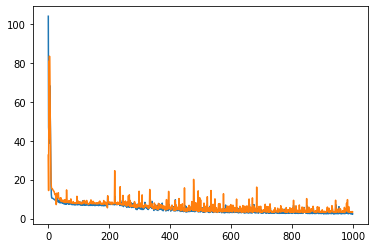

4/4 [==============================] - 0s 3ms/step - loss: 4.5673 - mape: 15.8451
loss=  4.567346572875977
mape=  15.845102310180664


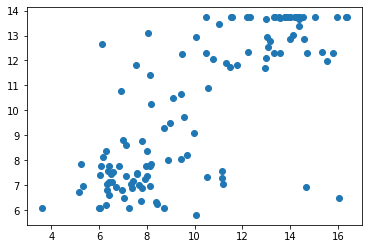

In [ ]:
# 딥러닝 학습
model = keras.Sequential()
# model.add(Input(189))
# model.add(Dense(10, activation='relu')) -> 이렇게 적어도 된다.
# model.add(Dense(10, activation ='relu', input_shape=(x.shpae[1],))) -> too, ....
model.add(Dense(10, activation ='relu', input_shape=(189,)))
model.add(Dense(10, activation ='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

hist = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

loss, mape = model.evaluate(test_x, test_y)
print("loss= ", loss)
print("mape= ", mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

In [ ]:
# plt.scatter(test_y, y_)
# plt.show()
# 이 그래프가 'y = x'의 그래프를 그릴 때 성능이 좋아지는 것을 눈으로 확인할 수 있다.
# 예측값과 정답이 같을 수록 y= x(x= test_y, y= y_)의 그래프가 그려지지
# 그래야 학습이 잘되고 예측값을 정답과 유사하게 뽑았다는 거야

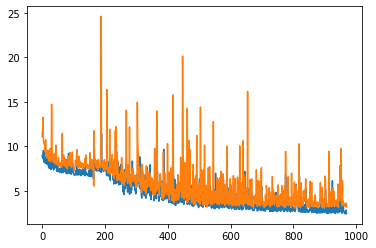

In [ ]:
plt.plot(hist.history['loss'][30:])
plt.plot(hist.history['val_loss'][30:])
plt.show()
# 앞의 그래프를 자르니 경향성이 보인다.
# 둘다 그래프가 내려가는 추세
# 학습을 더 시켜도 좋을것 같다.

In [ ]:
# standardization
df['dir_prev_num'] = df.dir_prev_num.astype(np.float)
df['num_actor'] = df.num_actor.astype(np.float)

df['dir_prev_num'] = ( df.dir_prev_num - df.dir_prev_num.mean() ) / df.dir_prev_num.std()
df['num_actor'] = ( df.num_actor - df.num_actor.mean() ) / df.num_actor.std()
df['dir_prev_bfnum_log'] = ( df.dir_prev_bfnum_log - df.dir_prev_bfnum_log.mean() ) / df.dir_prev_bfnum_log.std()
df['num_staff_log'] = ( df.num_staff_log - df.num_staff_log.mean() ) / df.num_staff_log.std()
df['box_off_num_log'] = ( df.box_off_num_log - df.box_off_num_log.mean() ) / df.box_off_num_log.std()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                1900      
                                                                 
 dense_22 (Dense)            (None, 10)                110       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,021
Trainable params: 2,021
Non-trainable params: 0
_________________________________________________________________


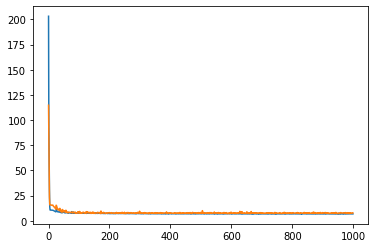

4/4 [==============================] - 0s 3ms/step - loss: 6.9310 - mape: 22.3572
loss=  6.931033134460449
mape=  22.35715675354004


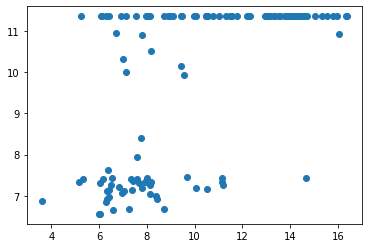

In [ ]:
model = keras.Sequential()
model.add(Dense(10, activation ='relu', input_shape=(189,)))
model.add(Dense(10, activation ='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape, RMSE"])
model.summary()

hist = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

loss, mape, rmse = model.evaluate(test_x, test_y)
print("loss= ", loss)
print("mape= ", mape)
print("rmse= ", rmse)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

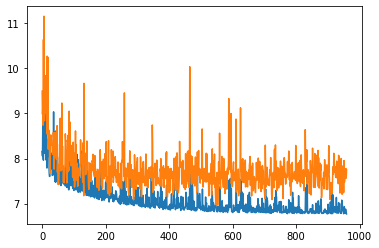

In [ ]:
plt.plot(hist.history['loss'][40:])
plt.plot(hist.history['val_loss'][40:])
plt.show()

shuffle 해서 넣어보기

In [ ]:
# 데이터 프레임 셔플
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,dir_prev_num,num_actor,box_off_num,dir_prev_bfnum_log,num_staff_log,box_off_num_log,genre_code_0,genre_code_1,genre_code_2,genre_code_3,genre_code_4,genre_code_5,genre_code_6,genre_code_7,genre_code_8,genre_code_9,genre_code_10,genre_code_11,distributtor_code_0,distributtor_code_1,distributtor_code_2,distributtor_code_3,distributtor_code_4,distributtor_code_5,distributtor_code_6,distributtor_code_7,distributtor_code_8,distributtor_code_9,distributtor_code_10,distributtor_code_11,distributtor_code_12,distributtor_code_13,distributtor_code_14,distributtor_code_15,distributtor_code_16,distributtor_code_17,distributtor_code_18,distributtor_code_19,distributtor_code_20,distributtor_code_21,...,distributtor_code_133,distributtor_code_134,distributtor_code_135,distributtor_code_136,distributtor_code_137,distributtor_code_138,distributtor_code_139,distributtor_code_140,distributtor_code_141,distributtor_code_142,distributtor_code_143,distributtor_code_144,distributtor_code_145,distributtor_code_146,distributtor_code_147,distributtor_code_148,distributtor_code_149,distributtor_code_150,distributtor_code_151,distributtor_code_152,distributtor_code_153,distributtor_code_154,distributtor_code_155,distributtor_code_156,distributtor_code_157,distributtor_code_158,distributtor_code_159,distributtor_code_160,distributtor_code_161,distributtor_code_162,distributtor_code_163,distributtor_code_164,distributtor_code_165,distributtor_code_166,distributtor_code_167,distributtor_code_168,screening_rat_code_0,screening_rat_code_1,screening_rat_code_2,screening_rat_code_3
0,-0.740798,0.528562,1717566,-0.848308,1.222820,1.328550,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,-0.740798,-0.697484,1161,-0.848308,-0.775234,-0.872963,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1.794252,-0.697484,3009406,1.299654,0.982094,1.497719,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,-0.740798,0.937244,2070,-0.848308,-2.249967,-0.698650,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.104219,-0.697484,1040,1.347695,-0.349343,-0.906131,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
y = np.array(df.box_off_num_log)
X = df.drop(columns=['box_off_num_log', 'box_off_num'])
X = np.array(X)

print(X.shape)
print(y.shape)

i = int(len(X)*0.8)
train_x, test_x = X[:i], X[i:]
train_y, test_y = y[:i], y[i:]

(600, 189)
(600,)


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                1900      
                                                                 
 dense_25 (Dense)            (None, 10)                110       
                                                                 
 dense_26 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,021
Trainable params: 2,021
Non-trainable params: 0
_________________________________________________________________


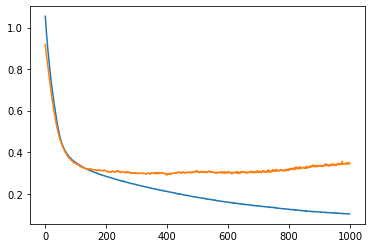

4/4 [==============================] - 0s 3ms/step - loss: 0.3069 - mape: 101.8489 - root_mean_squared_error: 0.5540
loss= 0.3069317042827606
mape= 101.84889221191406
rmse= 0.5540141463279724


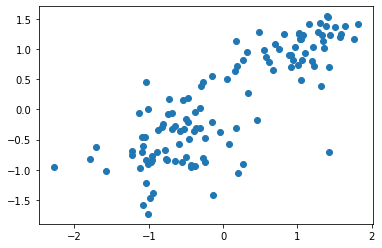

In [ ]:
from tensorflow.keras.metrics import RootMeanSquaredError

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape", RootMeanSquaredError()])
model.summary()

history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

loss, mape, rmse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)
print("rmse=", rmse)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

In [ ]:
predicted = np.exp(y_)

rmse = RootMeanSquaredError()
r = rmse(predicted, test_y)
print(r)


tf.Tensor(1.69906, shape=(), dtype=float32)


In [ ]:
predicted = np.exp(y_)
org_test_y = np.exp(test_y)

rmse = RootMeanSquaredError()
r = rmse(predicted, org_test_y)
print(r)

tf.Tensor(0.80736995, shape=(), dtype=float32)


# test data 넣어보기

In [ ]:
df_t = pd.read_csv('movies_test.csv')
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [ ]:
df_t = df_t.drop(columns=["title", "time", "release_time", "director"])
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distributor     243 non-null    object 
 1   genre           243 non-null    object 
 2   screening_rat   243 non-null    object 
 3   dir_prev_bfnum  107 non-null    float64
 4   dir_prev_num    243 non-null    int64  
 5   num_staff       243 non-null    int64  
 6   num_actor       243 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 13.4+ KB


In [ ]:
df_t.fillna(0, inplace=True)

In [ ]:
df_t.isnull().sum()

distributor       0
genre             0
screening_rat     0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
dtype: int64

In [ ]:
# dummy y 컬럼추가
df_t['box_off_num'] = df_t.dir_prev_num

In [ ]:
df_t['dir_prev_bfnum_log'] = np.log1p(df_t.dir_prev_bfnum)
df_t['num_staff_log'] = np.log1p(df_t.num_staff)

In [ ]:
df_t.distributor = df_t.distributor.astype('category')
df_t['distributtor_code'] = df_t.distributor.cat.codes

df_t.genre = df_t.genre.astype('category')
df_t['genre_code'] = df_t.genre.cat.codes

df_t.screening_rat = df_t.screening_rat.astype("category")
df_t['screening_rat_code'] = df_t.screening_rat.cat.codes

In [ ]:
df_t =pd.get_dummies(df_t, columns=['genre_code'])
df_t= pd.get_dummies(df_t, columns=['distributtor_code'])
df_t= pd.get_dummies(df_t, columns=['screening_rat_code'])

In [ ]:
df_t = df_t.drop(columns=['distributor',
                      'genre',
                      'screening_rat',
                      'dir_prev_bfnum',
                      'num_staff']  )

In [ ]:
df_t.head()

,dir_prev_num,num_actor,box_off_num,dir_prev_bfnum_log,num_staff_log,genre_code_0,genre_code_1,genre_code_2,genre_code_3,genre_code_4,genre_code_5,genre_code_6,genre_code_7,genre_code_8,genre_code_9,genre_code_10,genre_code_11,distributtor_code_0,distributtor_code_1,distributtor_code_2,distributtor_code_3,distributtor_code_4,distributtor_code_5,distributtor_code_6,distributtor_code_7,distributtor_code_8,distributtor_code_9,distributtor_code_10,distributtor_code_11,distributtor_code_12,distributtor_code_13,distributtor_code_14,distributtor_code_15,distributtor_code_16,distributtor_code_17,distributtor_code_18,distributtor_code_19,distributtor_code_20,distributtor_code_21,distributtor_code_22,...,distributtor_code_57,distributtor_code_58,distributtor_code_59,distributtor_code_60,distributtor_code_61,distributtor_code_62,distributtor_code_63,distributtor_code_64,distributtor_code_65,distributtor_code_66,distributtor_code_67,distributtor_code_68,distributtor_code_69,distributtor_code_70,distributtor_code_71,distributtor_code_72,distributtor_code_73,distributtor_code_74,distributtor_code_75,distributtor_code_76,distributtor_code_77,distributtor_code_78,distributtor_code_79,distributtor_code_80,distributtor_code_81,distributtor_code_82,distributtor_code_83,distributtor_code_84,distributtor_code_85,distributtor_code_86,distributtor_code_87,distributtor_code_88,distributtor_code_89,distributtor_code_90,distributtor_code_91,distributtor_code_92,screening_rat_code_0,screening_rat_code_1,screening_rat_code_2,screening_rat_code_3
0,2,3,2,12.613303,5.720312,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,4,3,4,12.744614,5.620401,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3,7,3,15.252168,6.040255,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2,2,2,13.446391,6.013715,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,1,1,10.365301,5.942799,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# df_t = df_t.sample(frac=1).reset_index(drop=True)

In [ ]:
df_t['dir_prev_num'] = df_t.dir_prev_num.astype(np.float)
df_t['num_actor'] = df_t.num_actor.astype(np.float)

df_t['dir_prev_num'] = ( df_t.dir_prev_num - df_t.dir_prev_num.mean() ) / df_t.dir_prev_num.std()
df_t['num_actor'] = ( df_t.num_actor - df_t.num_actor.mean() ) / df_t.num_actor.std()
df_t['dir_prev_bfnum_log'] = ( df_t.dir_prev_bfnum_log - df_t.dir_prev_bfnum_log.mean() ) / df_t.dir_prev_bfnum_log.std()
df_t['num_staff_log'] = ( df_t.num_staff_log - df_t.num_staff_log.mean() ) / df_t.num_staff_log.std()
# df['box_off_num_log'] = ( df.box_off_num_log - df.box_off_num_log.mean() ) / df.box_off_num_log.std()

In [ ]:
y = df_t.box_off_num.to_numpy()
df_t.drop(columns=['box_off_num'], inplace=True)

x = df_t.to_numpy()

AttributeError: ignored

In [ ]:
print(x.shape)
print(y.shape)

(243, 113)
(243,)


In [ ]:
# 아............test data에서 code 했을 시....
# train data의 전체 code랑 달라서 
# train과 test를 섞어서 한번에 해야한다.
# 아 시행을 통해 느낀 정말 큰 재산을 얻었다.....